In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
mnist_train = pd.read_csv("datasets/mnist_train.csv")

In [3]:
mnist_test = pd.read_csv("datasets/mnist_test.csv")

In [4]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, y_train = mnist_train.drop("label",axis=1).to_numpy(), mnist_train["label"].to_numpy()

In [6]:
X_test, y_test = mnist_test.drop("label",axis=1).to_numpy(), mnist_test["label"].to_numpy()

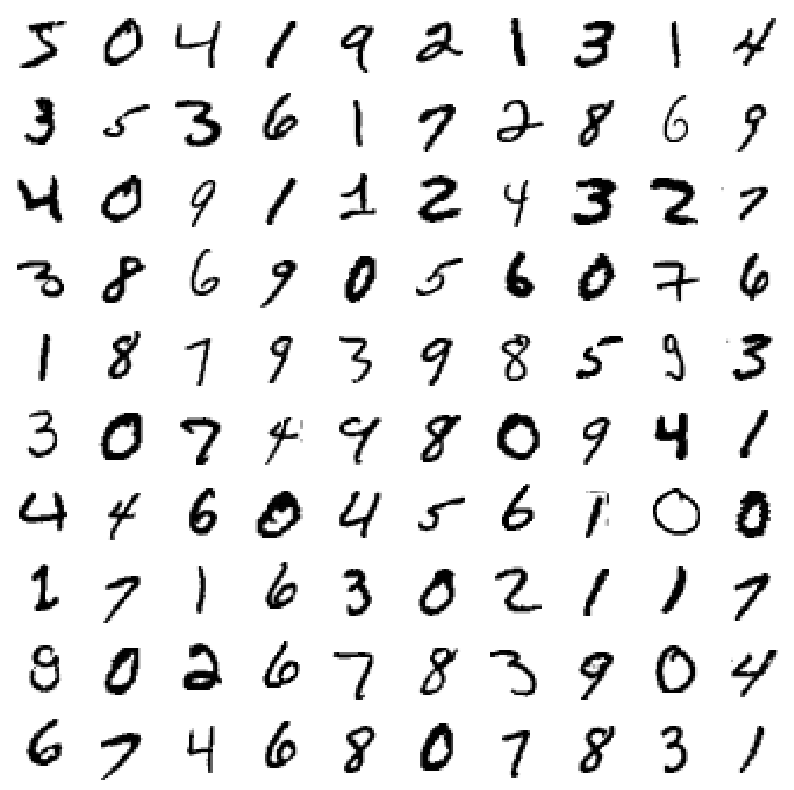

In [7]:
fig = plt.figure(figsize=(10, 10))
rows = 10
columns = 10
for i, digit in enumerate(X_train[:100]):
    image_digit = digit.reshape(28, 28)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image_digit, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([X_train[0]])

array([ True])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=5)

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [14]:
np.average(np.array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667]))

0.9603333340000001

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [21]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_train_5, y_train_pred)
result

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

In [24]:
 precision = result[1][1]/(result[1][1]+result[0][1])

In [25]:
precision

0.7547327860613168

In [26]:
from sklearn.metrics import precision_score, recall_score
pre_score = precision_score(y_train_5, y_train_pred)

In [27]:
pre_score

0.7547327860613168